# MANTENIMIENTO PREDICTIVO EN MOTORES DE AVIÓN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [3]:
df= pd.read_csv('../data/processed/datos_normalizados.csv', delimiter=',')

df

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s17,s18,s19,s20,s21,failure_cycle,is_failure_cycle,RUL,label1,label2
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.333333,0.0,0.0,0.713178,0.724662,112,0,191.0,0,0
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.333333,0.0,0.0,0.666667,0.731014,112,0,190.0,0,0
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.166667,0.0,0.0,0.627907,0.621375,112,0,189.0,0,0
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.333333,0.0,0.0,0.573643,0.662386,112,0,188.0,0,0
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.416667,0.0,0.0,0.589147,0.704502,112,0,187.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.477011,0.250000,0.0,0.0,0.686747,0.587312,0.782917,0.0,...,0.750000,0.0,0.0,0.271318,0.109500,20,0,4.0,1,2
20627,100,197,0.408046,0.083333,0.0,0.0,0.701807,0.729453,0.866475,0.0,...,0.583333,0.0,0.0,0.124031,0.366197,20,0,3.0,1,2
20628,100,198,0.522989,0.500000,0.0,0.0,0.665663,0.684979,0.775321,0.0,...,0.833333,0.0,0.0,0.232558,0.053991,20,0,2.0,1,2
20629,100,199,0.436782,0.750000,0.0,0.0,0.608434,0.746021,0.747468,0.0,...,0.583333,0.0,0.0,0.116279,0.234466,20,0,1.0,1,2


# BALANCEO DE LOS DATOS POSIBLE TARGET

In [4]:
class_counts = df['label2'].value_counts()
class_counts

label2
0    17531
2     1600
1     1500
Name: count, dtype: int64

In [5]:
class_counts = df['label1'].value_counts()
class_counts

label1
0    17531
1     3100
Name: count, dtype: int64

In [6]:
class_counts = df['RUL'].value_counts()
class_counts

RUL
0.0      100
1.0      100
2.0      100
3.0      100
4.0      100
        ... 
356.0      1
344.0      1
343.0      1
342.0      1
341.0      1
Name: count, Length: 362, dtype: int64

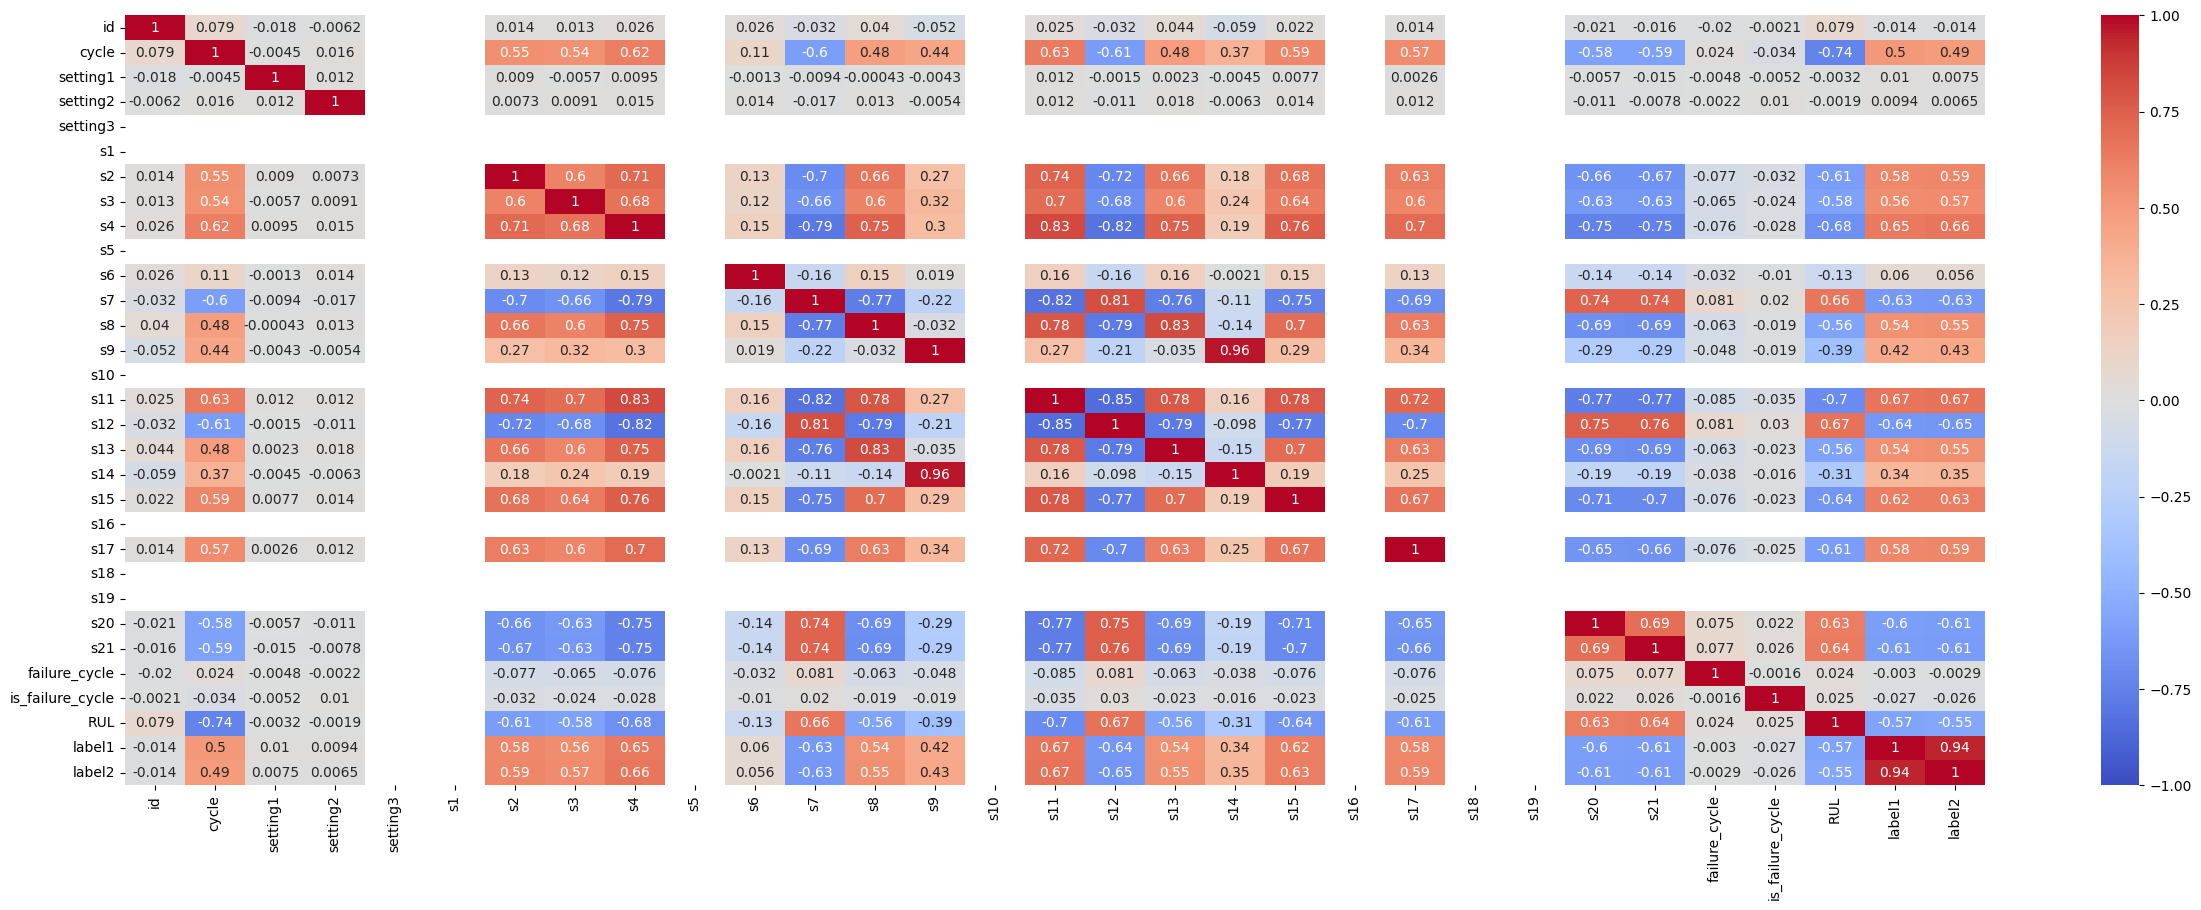

In [7]:
plt.figure(figsize=[30,10])
sns.heatmap (df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1);

In [72]:
cols_a_borrar = ['setting1', 'setting2', 'setting3', 's1','s5','s6','s10','s16', 's18', 's19', 'failure_cycle','is_failure_cycle']
df_red = df.drop(columns=cols_a_borrar)
df_red

,id,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,RUL,label1,label2
0,1,1,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,191.0,0,0
1,1,2,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,190.0,0,0
2,1,3,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,189.0,0,0
3,1,4,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,188.0,0,0
4,1,5,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,187.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,4.0,1,2
20627,100,197,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,3.0,1,2
20628,100,198,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,2.0,1,2
20629,100,199,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,1.0,1,2


In [73]:
df_red['cumcount'] = df_red.groupby('id').cumcount()
df_filtered = df_red[df_red['cumcount'] >= df_red['cumcount'].max() * 0.4]
df_filtered = df_filtered.drop(columns='cumcount')
df_filtered

,id,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,RUL,label1,label2
145,1,146,0.454819,0.342490,0.448515,0.442834,0.333333,0.108858,0.464286,0.520256,0.352941,0.150944,0.409003,0.333333,0.426357,0.592516,46.0,0,0
146,1,147,0.313253,0.519076,0.467758,0.521739,0.363636,0.087544,0.565476,0.475480,0.352941,0.135153,0.453636,0.416667,0.488372,0.516708,45.0,0,0
147,1,148,0.545181,0.413996,0.500338,0.481481,0.393939,0.086153,0.380952,0.509595,0.397059,0.126638,0.395152,0.333333,0.488372,0.491025,44.0,0,0
148,1,149,0.509036,0.473948,0.480250,0.433172,0.409091,0.159338,0.583333,0.520256,0.397059,0.125916,0.570219,0.500000,0.488372,0.500276,43.0,0,0
149,1,150,0.557229,0.391759,0.455267,0.599034,0.333333,0.103338,0.446429,0.385928,0.485294,0.118949,0.568295,0.500000,0.418605,0.433582,42.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,4.0,1,2
20627,100,197,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,3.0,1,2
20628,100,198,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,2.0,1,2
20629,100,199,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,1.0,1,2


In [52]:
class_counts = df_filtered['label2'].value_counts()
class_counts

label2
0    3537
2    1450
1    1187
Name: count, dtype: int64

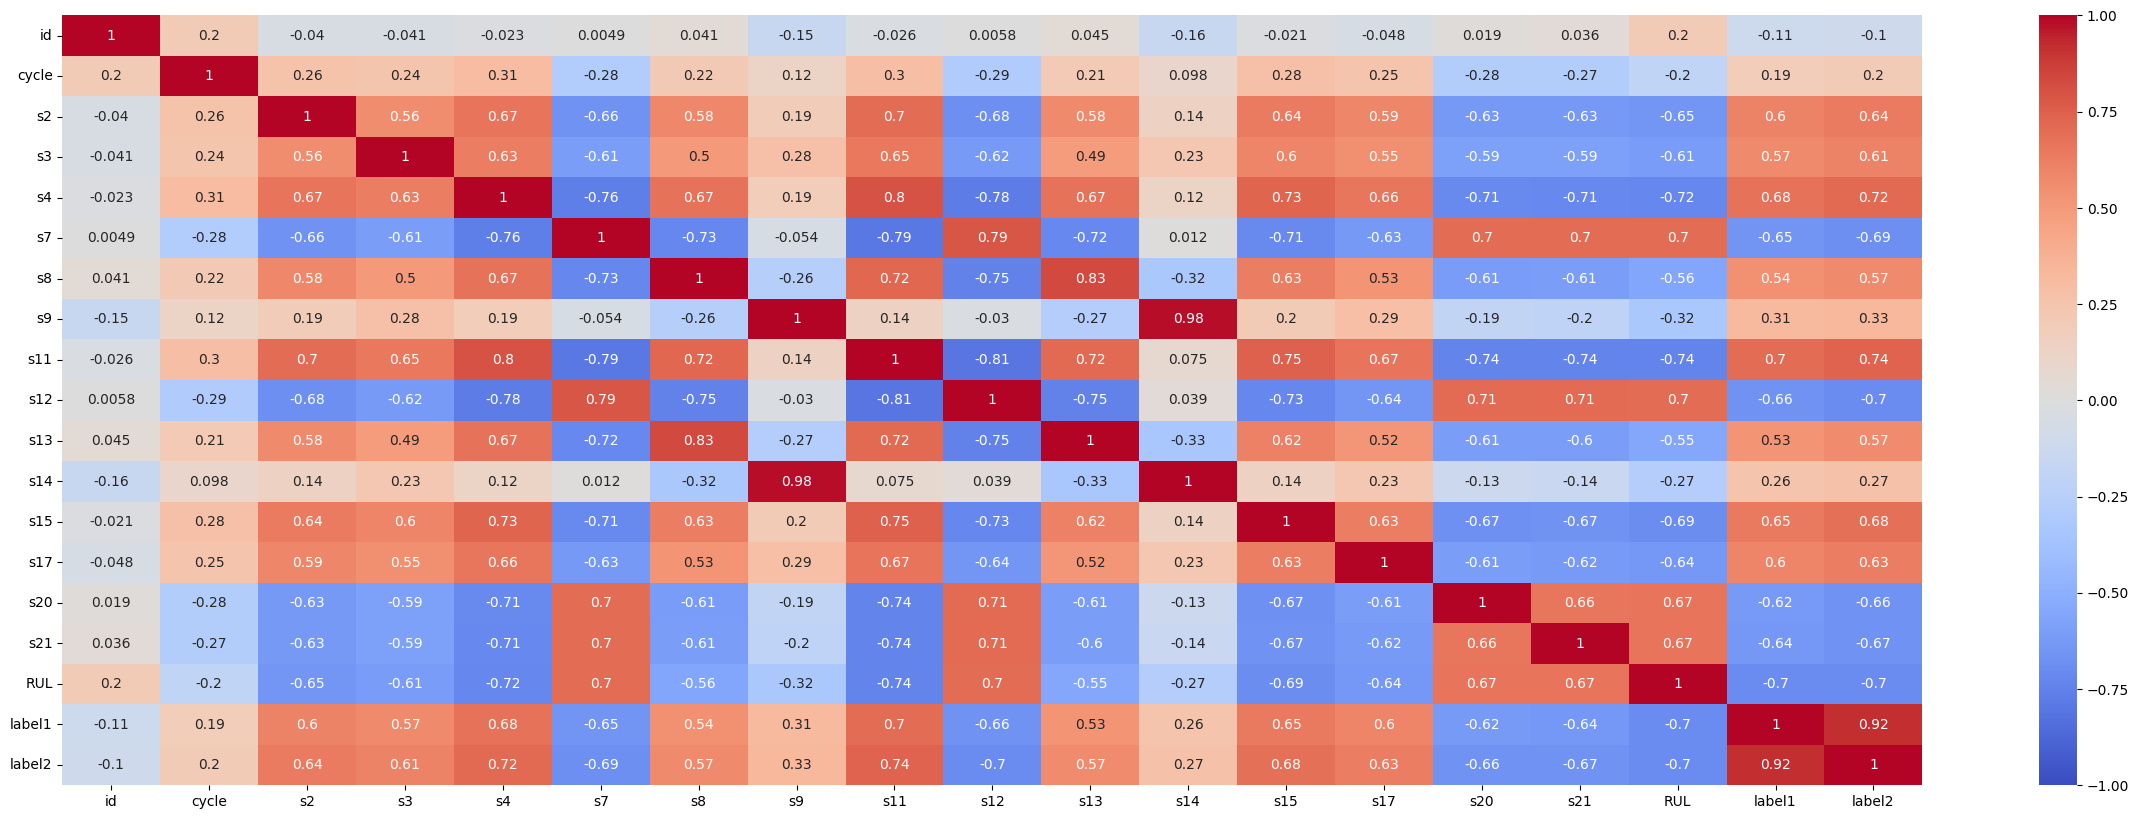

In [53]:
plt.figure(figsize=[30,10])
sns.heatmap (df_filtered.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1);

# MODELOS PARA PREDECIR label2

## LOGISTIC REGRESION

In [54]:
X = np.array(df_filtered.drop(columns=['id', 'cycle', 'label1', 'label2']))
y = np.array(df_filtered['label2'])

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [56]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
modelo = LogisticRegression(max_iter=1000)

modelo.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [57]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones

predictions = modelo.predict(X_test)
print(accuracy_score(y_test, predictions))

# Reporte de clasificación
print(classification_report(y_test, predictions))


# Matriz de confusión
print(confusion_matrix(y_test, predictions))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       708
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       290

    accuracy                           1.00      1235
   macro avg       1.00      1.00      1.00      1235
weighted avg       1.00      1.00      1.00      1235

[[708   0   0]
 [  0 237   0]
 [  0   0 290]]


In [58]:
c_matrix = confusion_matrix(y_test, predictions)

In [59]:
print(c_matrix)

[[708   0   0]
 [  0 237   0]
 [  0   0 290]]


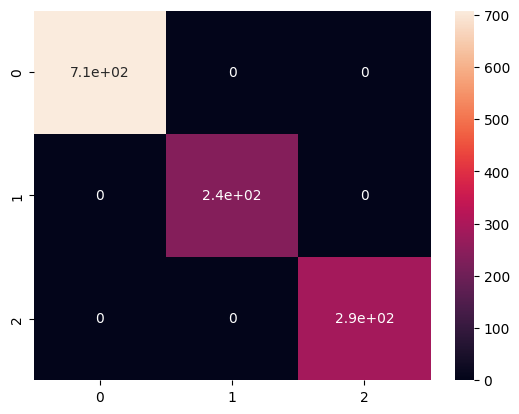

In [60]:
import seaborn as sns
sns.heatmap(c_matrix, annot=True);

In [61]:
class_counts = df_filtered['label2'].value_counts()
class_counts

label2
0    3537
2    1450
1    1187
Name: count, dtype: int64

## RANDOM FOREST


In [64]:
from sklearn.ensemble import RandomForestClassifier

# Crear el clasificador
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Precisión: 100.00%


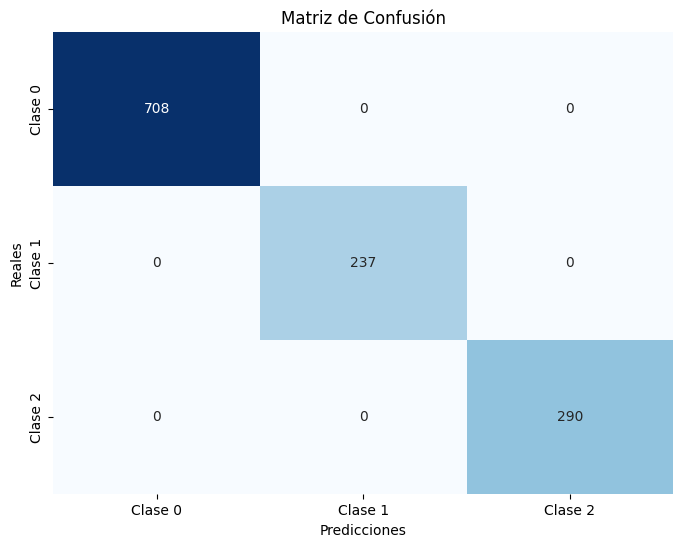

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Realizar predicciones
y_pred = clf.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy * 100:.2f}%')

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2'], 
            yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

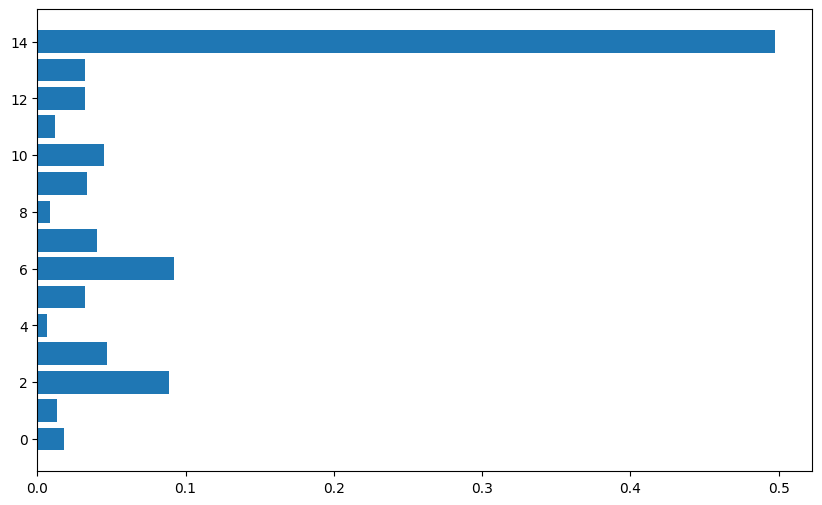

In [66]:
# Obtener importancia de las características
importances = clf.feature_importances_

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), X.columns)
plt.xlabel('Importancia')
plt.title('Importancia de las Características')
plt.show()


In [71]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# Mostrar resultados
print(f'Precisión media: {cv_scores.mean() * 100:.2f}%')
print(f'Desviación estándar: {cv_scores.std() * 100:.2f}%')


Precisión media: 100.00%
Desviación estándar: 0.00%


## Pipeline con scaler y clasificador

In [63]:

# 4. Pipeline con scaler + clasificador
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# 5. Grid Search para ajustar hiperparámetros
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
}
grid = GridSearchCV(pipe, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid.fit(X_train, y_train)

print("Mejor configuración:", grid.best_params_)

# 6. Evaluación en test
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Mejor configuración: {'clf__max_depth': None, 'clf__n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       708
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       290

    accuracy                           1.00      1235
   macro avg       1.00      1.00      1.00      1235
weighted avg       1.00      1.00      1.00      1235

[[708   0   0]
 [  0 237   0]
 [  0   0 290]]


## RNN simple 1 feature

# PRUEBA DE PREDICCIÓN

# MAS MODELOS

# EJEMPLO DE USO PARA PREDECIR EN TIEMPO REAL 